# How are weather trends in the Midwest U.S. related with corn futures prices?

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load FAOSTAT data
corn_data = pd.read_csv("../data/raw/FAOSTAT_data_en_6-27-2025.csv")

## Introduction

Corn is one of the most consumed grains in human history. It has served as a staple food, we use it as a base for livestock feed, and it is used in large quantities industrially. Its importance in global agricultural markets makes it a key commodity for both producers and investors. The largest producer and exporter of corn is the United States, accounting for approximately 30% of the global production. (See analysis below). Therefore, fluctuations in US corn yields can significantly influence global food prices and create imbalances in the industrialized production.

The U.S. corn growing season typically begins in April and extends through September or October (USDA), with planting concentrated in the spring and crop development during the summer months. Harvesting typically begins in late August and can extend into November, depending on regional climatic conditions.

<div align="center">
  <img src="../images/us_crop_1_calendar.png" alt="US Corn Crop Calendar – USDA FAS" width="600"/>
  <p><em>Figure: U.S. corn crop calendar showing typical planting and harvest periods. Source: <a href="https://ipad.fas.usda.gov/countrysummary/Default.aspx">USDA FAS</a>.</em></p>
</div>

Because corn is so sensitive to climatic conditions, climatic variables such as temperature, precipitation, and extreme weather events play a crucial role in determining yield. For example, periods of excessive heat during pollination or drought stress during grain fill can severely reduce productivity. Conversely, stable and moderate growing conditions often result in bumper harvests.


In [6]:
year = 2022
corn_prod_data_2022 = corn_data.copy()
corn_prod_data_2022 = corn_prod_data_2022.loc[(corn_data['Year'] == year) & (corn_data['Element'] == 'Production')]
corn_prod_data_2022.sort_values(by = ['Value'], ascending = False, inplace = True)
corn_prod_data_2022.drop(6035, inplace = True)
corn_prod_data_2022['Production Percentage'] = corn_prod_data_2022['Value'] / corn_prod_data_2022['Value'].sum()

In [7]:
corn_prod_data_2022[['Area', 'Value', 'Production Percentage']].head()

,Area,Value,Production Percentage
27460,United States of America,346739460.0,0.298310
5846,China,277430136.0,0.238681
3767,Brazil,109738941.0,0.094412
1115,Argentina,59037179.0,0.050791
12939,India,33729540.0,0.029019


In [10]:
corn_prod_data_2022['Value'].head()

27460    346739460.0
5846     277430136.0
3767     109738941.0
1115      59037179.0
12939     33729540.0
Name: Value, dtype: float64

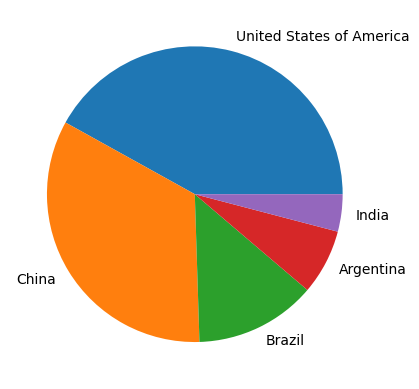

In [12]:
plt.pie(corn_prod_data_2022['Value'].head(), labels = corn_prod_data_2022['Area'].head())
plt.show()

As we can see, the United States is the leading producer of corn, with an annual production of 346,739,460 tonnes. The country benefits from a vast agricultural infrastructure, a favorate climate and advanced farming techniques. China follows closely behind the U.S. with an annual production of 277,430,136 tonnes. Corn is crucial in China for livestock feed and as a staple in various food products. Brazil is also a major player in the global corn market, with an annual production of 109,738,941 tonnes. The country's extensive agricultural lands and favorable growing conditions allow for high yields. Brazil's corn is primarily used for animal feed and biofuel production. Argentina ranks among the top corn-producing countries with an annual output of 59,037,179 tonnes. Corn is a vital crop for Argentina’s economy, heavily contributing to its agricultural exports. The country’s favorable climate and fertile soils support high corn yields. Finally, India produces 33,729,540 tonnes of corn. India's diverse climate allows for multiple harvest annually. <cite>[Corn (maize) production by country, n.d][2]</cite>

[2]: https://worldostats.com/country-stats/corn-maize-production-by-country/



### Growing seasons characteristics and requirements in the corn belt

Despite the US is the major producer of corn in the world, not all agricultural land within the U.S. is assign to growing corn, this is because corn requires some specific conditions to grow, in particular, the land within the U.S. that is dedicated to growing corn is usually known as the corn belt

> ... traditional area in the midwestern United States, roughly covering western Indiana, Illinois, Iowa, Missouri, eastern Nebraska, and eastern Kansas, in which corn (maize) and soybeans are the dominant crops. Soils are deep, fertile, and rich in organic material and nitrogen, and the land is relatively level. <cite>[Encyclopaedia Britannica][1]</cite>

[1]: https://www.britannica.com/place/Corn-Belt

<div align="center">
  <img src="../images/USA_Corn.png" alt="US Corn Production – USDA" width="800"/>
  <p><em>Figure: U.S. corn production by county. Source: <a href="https://ipad.fas.usda.gov/countrysummary/images/US/cropprod/USA_Corn.png">USDA FAS</a>.</em></p>
</div>



Since weather in  the United States varies seasonally, there are some specific timeframes when it's ideal to plant corn, we call this timeframes a crop growing season

> In the simplest terms, a crop growing season refers to that period of the year when seasonal weather is favorable for growth. In the Corn Belt, the "growing season" is often defined as the number of freeze-free days during the year beginning with the last freezing temperature in the spring and ending with the first occurrence of freezing temperatures in the autumn. This definition makes good physical sense because of its relationship to the freezing temperature for water, the most universal compound in living plants. <cite>[Neild & Newman][2]</cite>

[2]: https://www.extension.purdue.edu/extmedia/nch/nch-40.html

As _Nield & Newman_ say in the article, the average spring planting date in the Corn Belt is closely related to the last spring freeze, and adapted full-season hybrids must reach maturity by the average first autumn freeze. In the major portion of the Corn Belt, full-season hybrids are adapted to the average frost-free season. In southern areas, hybrids reach maturity in about five months or 150 days. Commercial hybrids in the central Corn Belt mature in 130 to 150 days, while grain hybrids mature in four months or 120 days in the northern portions. The northern limit of the U.S. Corn Belt closely relates to the average frost-free growing season.

Thus we can conclude that generally a crop season within the Corn Belt tends to last between 120 to 150 days (4 to 5 months)

https://www.investopedia.com/articles/markets-economy/090316/6-countries-produce-most-corn.asp

https://www.world-grain.com/media/photos/155-world-s-top-10-corn-producers

https://worldostats.com/country-stats/corn-maize-production-by-country/

https://www.fao.org/faostat/en/#data/QCL

https://www.ers.usda.gov/topics/crops/corn-and-other-feed-grains/feed-grains-sector-at-a-glance

https://www.britannica.com/place/Corn-Belt

https://www.extension.purdue.edu/extmedia/nch/nch-40.html

https://ipad.fas.usda.gov/countrysummary/Default.aspx?id=US